<a href="https://colab.research.google.com/github/suriya-mouli/CNN_Model/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# Upload CSV
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')
# Quick overview
print("Shape of dataset:", df.shape)
print(df.head())
print(df.info())



Shape of dataset: (918, 12)
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------

In [ ]:
df.columns


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
# Split Features & Labels
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']


Missing Value

In [ ]:
# Handle missing values

print("Missing values per column:\n", df.isnull().sum())
df = df.drop_duplicates()

Missing values per column:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Duplicate value


In [ ]:
# Remove duplicate rows

print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicate rows: 0


In [ ]:
# Encode target label
label_column = 'HeartDisease'
if df[label_column].dtype == 'object':
    from sklearn.preprocessing import LabelEncoder
    df[label_column] = LabelEncoder().fit_transform(df[label_column])

In [ ]:
# Encode categorical variables

categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

In [ ]:
# Numeric columns for visualization
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

Outliers


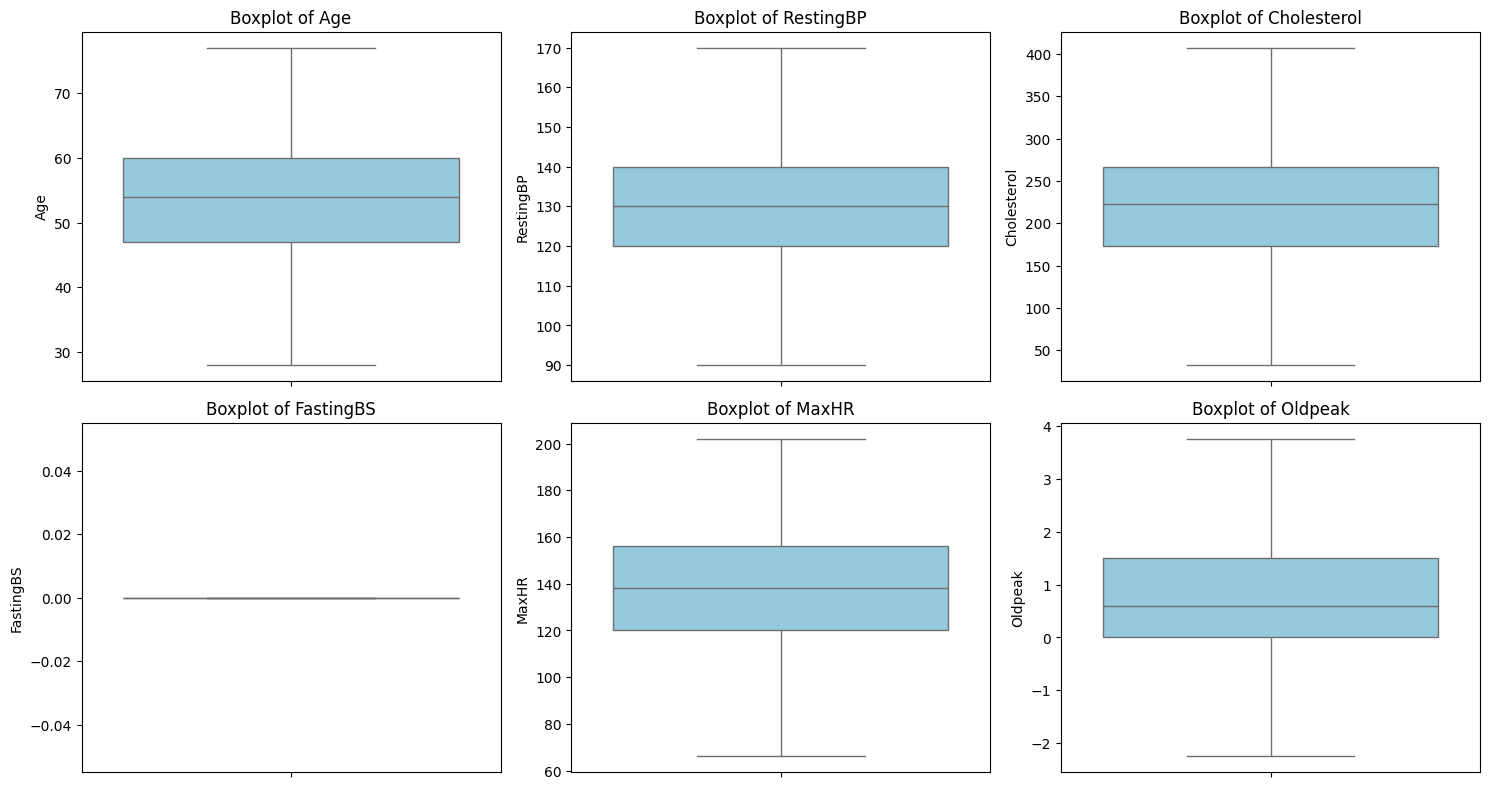

In [ ]:
# Boxplots to show outliers
plt.figure(figsize=(15,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Outlier handling
import numpy as np

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print(" Outliers handled using capping.")

 Outliers handled using capping.


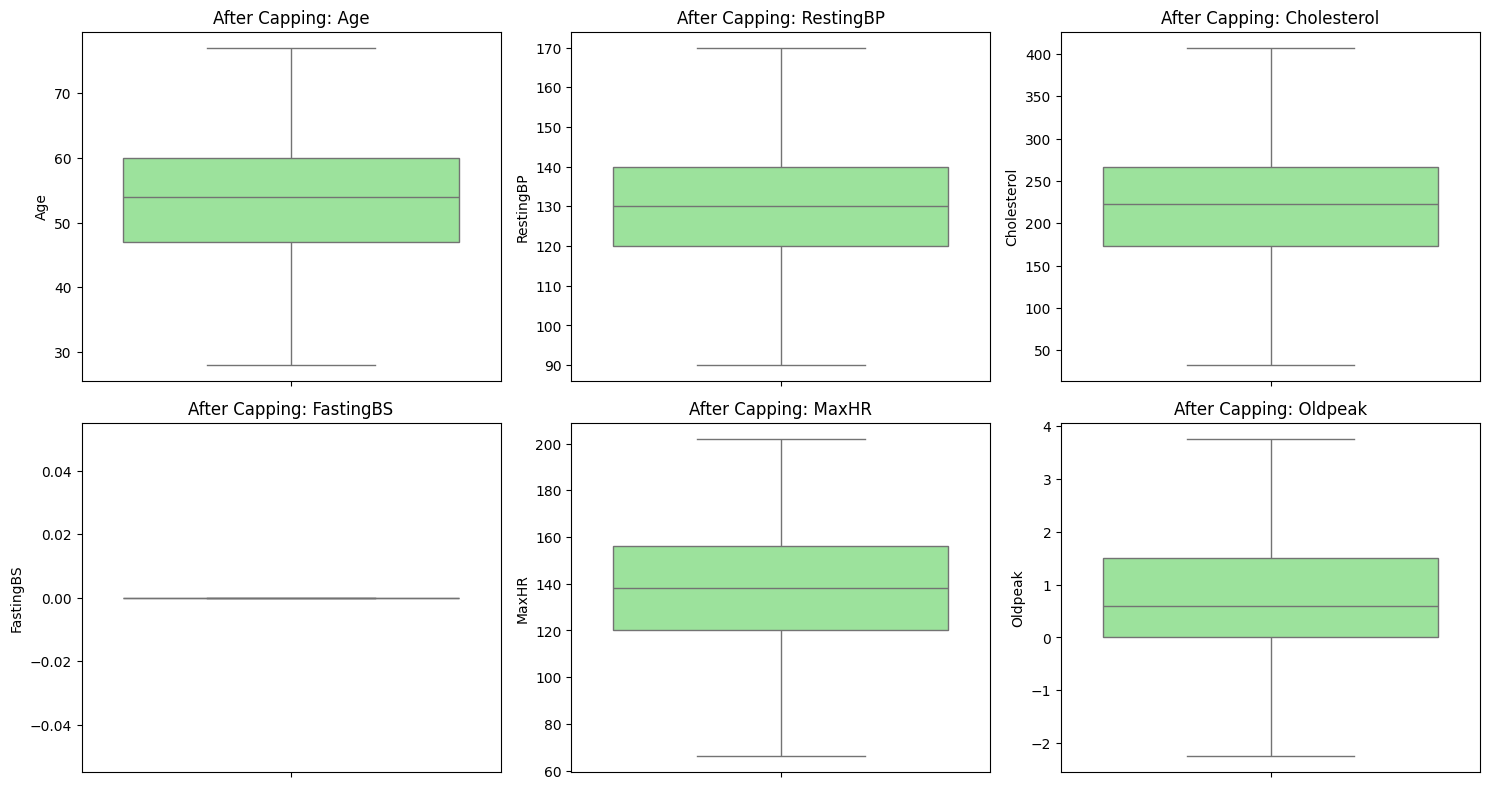

In [ ]:
# Optional: Show boxplots after capping
plt.figure(figsize=(15,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col, color='lightgreen')
    plt.title(f'After Capping: {col}')
plt.tight_layout()
plt.show()

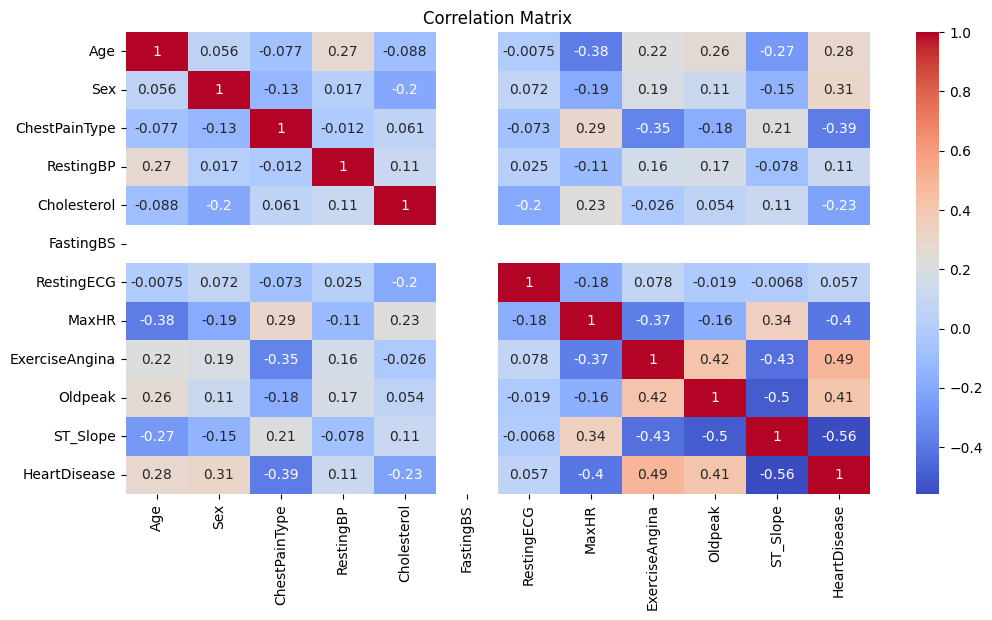

In [ ]:
# Correlation heatmap

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# SPLIT FEATURES AND LABELS
label_column = 'HeartDisease'

X = df.drop(label_column, axis=1)
y = df[label_column]

In [ ]:
#  TRAIN / VALIDATION / TEST SPLIT
# 70% Train, 15% Validation, 15% Test
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

In [ ]:
#  NORMALIZATION
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)



In [ ]:
#  HANDLE CLASS IMBALANCE

from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                 classes=np.unique(y_train),
                                                 y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Neural Network

In [ ]:
# BUILD NEURAL NETWORK MODEL
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=50, batch_size=32, class_weight=class_weights_dict)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.5582 - auc: 0.5865 - loss: 0.6825 - val_accuracy: 0.8261 - val_auc: 0.8838 - val_loss: 0.5144
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7945 - auc: 0.8759 - loss: 0.5123 - val_accuracy: 0.8188 - val_auc: 0.9075 - val_loss: 0.4268
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8284 - auc: 0.8725 - loss: 0.4607 - val_accuracy: 0.8261 - val_auc: 0.9155 - val_loss: 0.3917
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8437 - auc: 0.9153 - loss: 0.3952 - val_accuracy: 0.8406 - val_auc: 0.9182 - val_loss: 0.3817
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8399 - auc: 0.9019 - loss: 0.4012 - val_accuracy: 0.8333 - val_auc: 0.9192 - val_loss: 0.3831
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8239 - auc: 0.9001 - loss: 0.4037 - val_accuracy: 0.8551 - val_auc: 0.9204 - val_loss: 0.3739
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step -

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88        55
           1       0.94      0.90      0.92        83

    accuracy                           0.91       138
   macro avg       0.90      0.91      0.90       138
weighted avg       0.91      0.91      0.91       138



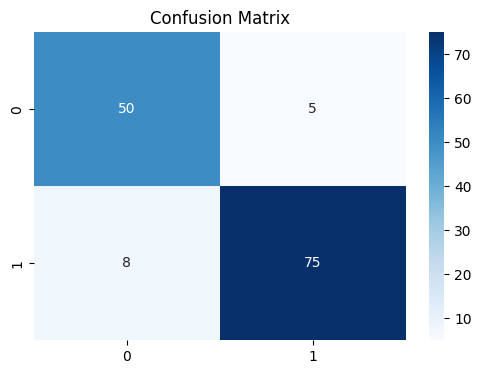

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

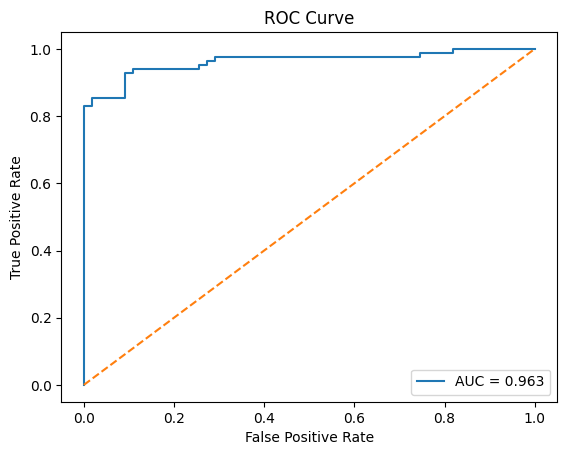

In [ ]:
# ROC Curve + AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="AUC = {:.3f}".format(roc_auc))
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


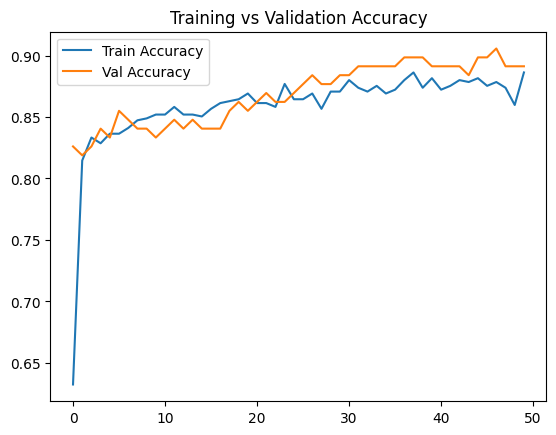

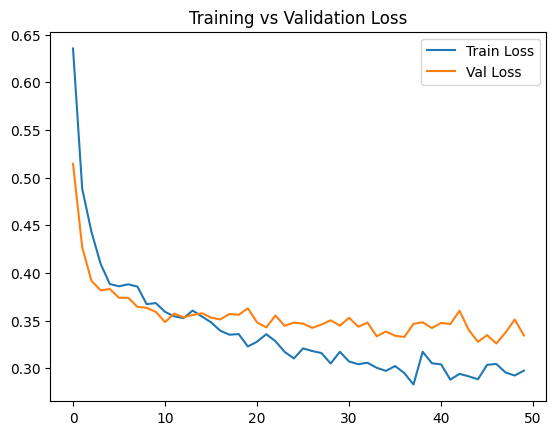

In [ ]:
# Training Curves
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

In [ ]:
# TEST MODEL WITH SAMPLE
sample = X_test[0].reshape(1, -1)  # Use NumPy indexing
prediction = model.predict(sample)

if prediction > 0.5:
    print("\n Model Prediction: HIGH Risk of Heart Disease")
else:
    print("\n Model Prediction: LOW Risk of Heart Disease")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step

 Model Prediction: HIGH Risk of Heart Disease
